In [30]:
# Import library
import glob
import pandas as pd
from gensim.models import TfidfModel
import re, os
import pickle
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from gensim import similarities
from nltk.stem import PorterStemmer
from gensim import corpora


In [31]:
bookInterstedIn='RelativityandGravitation'

In [32]:
#---------------Read library from the file system --------------------

In [33]:
# The folder created below
folder = "library/"

# List all the .txt files
files = glob.glob(folder + "*.txt")

files

['library/Relativity.txt',
 'library/ExperimentalMechanics.txt',
 'library/ThePoetryofScience.txt',
 'library/TheEinsteinTheoryofRelativityAConciseStatement.txt',
 'library/TheGravityBusiness.txt',
 'library/FromNewtontoEinstein.txt',
 'library/The BoyPlaybookofScience.txt',
 'library/SidelightsonRelativity.txt',
 'library/RelativityTheSpecialandGeneralTheory.txt',
 'library/TheEinsteinSeeSaw.txt',
 'library/AetherandGravitation.txt',
 'library/The EarthBeginning.txt',
 'library/specialtheoryRelativity.txt',
 'library/TheTheoriesof DarwinandTheirRelationtoPhilosophyReligionandMorality.txt',
 'library/RelativityandGravitation.txt',
 'library/ThoughtsonArt.txt',
 'library/EinsteinTheoriesofRelativityandGravitation.txt',
 'library/TheJuniorClassics.txt']

In [34]:
# define objects to hold text and titles
content_txts = []
book_titles = []

for n in files:
    f = open(n, encoding='utf-8-sig')
    val = re.sub('[\W_]+', ' ', f.read())
    content_txts.append(val)
    book_titles.append(os.path.basename(n).replace(".txt", ""))

[len(t) for t in content_txts]

[24297,
 519663,
 875023,
 59083,
 56364,
 169246,
 953601,
 69853,
 24297,
 69011,
 941247,
 600351,
 197572,
 669416,
 548935,
 273437,
 548935,
 716050]

In [35]:
# the list contains all the book titles
for i in range(len(book_titles)):
    if(book_titles[i]==bookInterstedIn):
        typeOfBook = i

print(str(typeOfBook))

14


In [36]:
# Define a list of stop words
stoplist = set('for w a of the anyone anywhere no almost with and to in to be which s j use this bird most it give copy you some is at that we i who whom show via may my our might as well project by gutenberg ebook'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in content_txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens
texts[typeOfBook][0:20]

['einstein',
 'theories',
 'relativity',
 'gravitation',
 'malcolm',
 'united',
 'states',
 'other',
 'parts',
 'world',
 'cost',
 'restrictions',
 'whatsoever',
 'away',
 'or',
 're',
 'under',
 'terms',
 'license',
 'included']

In [37]:
# Create an instance of a PorterStemmer object
porter = PorterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

# Save to pickle file
pickle.dump( texts_stem, open( "library/porterstem.p", "wb" ) )

In [38]:
# Load the stemmed tokens list from the pregenerated pickle file
texts_stem = pickle.load(open("library/porterstem.p", "rb" ) )

# Print the 20 first stemmed tokens from
texts_stem[typeOfBook][0:20]

['einstein',
 'theori',
 'rel',
 'gravit',
 'malcolm',
 'unit',
 'state',
 'other',
 'part',
 'world',
 'cost',
 'restrict',
 'whatsoev',
 'away',
 'or',
 're',
 'under',
 'term',
 'licens',
 'includ']

In [39]:
# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]


# Print the first five elements using BoW model
bows[typeOfBook][0:5]

[(0, 12), (2, 61), (3, 2), (4, 2), (5, 1)]

In [40]:
# Convert the BoW model into a DataFrame
df_bow_origin = pd.DataFrame(bows[typeOfBook])

# Add the column names to the DataFrame
df_bow_origin.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values(by="occurrences", ascending=False).head(10)

,index,occurrences,token
85,105,656,are
417,483,651,not
575,649,614,space
614,693,606,time
437,504,592,or
1618,2712,537,observ
297,345,480,have
114,140,471,but
276,322,466,from
316,368,464,if


In [41]:
# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model 
model[bows[typeOfBook]]

[(0, 0.004331109625285323),
 (3, 0.003210653132712562),
 (4, 0.004349650457848804),
 (5, 0.002174825228924402),
 (6, 0.008699300915697608),
 (8, 0.005071502062063024),
 (13, 0.006467563252772673),
 (14, 0.003482534059185286),
 (15, 0.007960077849566368),
 (16, 0.0021655548126426616),
 (17, 0.0014925145967936938),
 (18, 0.0009326584824400785),
 (20, 0.0012884196796676742),
 (22, 0.001990019462391592),
 (23, 0.006965068118370572),
 (25, 0.0032483322189639924),
 (31, 0.0006442098398338371),
 (32, 0.0007218516042142205),
 (33, 0.004477543790381081),
 (34, 0.0008026632831781405),
 (35, 0.0008026632831781405),
 (37, 0.0008026632831781405),
 (39, 0.0019326295195015112),
 (44, 0.0014925145967936938),
 (45, 0.0009749119825895731),
 (73, 0.007218516042142206),
 (84, 0.0009749119825895731),
 (94, 0.001605326566356281),
 (97, 0.004073451774460471),
 (100, 0.003490767255855753),
 (106, 0.007462572983968469),
 (122, 0.01846125551309723),
 (129, 0.0038996479303582926),
 (131, 0.006761773997690569),
 

In [42]:
# Convert the tf-idf model into a DataFrame
df_tfidf = pd.DataFrame(model[bows[typeOfBook]])

# Name the columns of the DataFrame id and score
df_tfidf.columns=["id", "score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by="score", ascending=False).head(10)

,id,score,token
2490,8693,0.349934,coordin
50,277,0.293775,euclidean
47,260,0.257377,einstein
1910,5513,0.240128,geometri
1843,5187,0.186218,essay
45,229,0.162138,dimension
42,189,0.126821,continuum
1046,2712,0.125209,observ
3018,13392,0.125055,contest
1764,4746,0.108441,curvatur


In [43]:
#Compute similarity matrix  
sims = similarities.MatrixSimilarity(model[bows])

# Transform results to DF
sim_df = pd.DataFrame(list(sims))

# Add book_titles of the books as columns and index of DF
sim_df.columns = book_titles
sim_df.index = book_titles

# Print matrix
sim_df


,Relativity,ExperimentalMechanics,ThePoetryofScience,TheEinsteinTheoryofRelativityAConciseStatement,TheGravityBusiness,FromNewtontoEinstein,The BoyPlaybookofScience,SidelightsonRelativity,RelativityTheSpecialandGeneralTheory,TheEinsteinSeeSaw,AetherandGravitation,The EarthBeginning,specialtheoryRelativity,TheTheoriesof DarwinandTheirRelationtoPhilosophyReligionandMorality,RelativityandGravitation,ThoughtsonArt,EinsteinTheoriesofRelativityandGravitation,TheJuniorClassics
Relativity,1.000000,0.008280,0.003962,0.053577,0.000423,0.022279,0.003726,0.027098,1.000000,0.001548,0.001311,0.002820,0.056891,0.002888,0.044164,0.003139,0.044164,0.003569
ExperimentalMechanics,0.008280,1.000000,0.091683,0.055434,0.004846,0.078886,0.200147,0.023681,0.008280,0.020880,0.032216,0.096258,0.063486,0.027802,0.088884,0.042188,0.088884,0.044035
ThePoetryofScience,0.003962,0.091683,1.000000,0.102918,0.017416,0.147916,0.484822,0.066549,0.003962,0.064418,0.098532,0.241800,0.073009,0.126757,0.133446,0.121210,0.133446,0.067292
TheEinsteinTheoryofRelativityAConciseStatement,0.053577,0.055434,0.102918,1.000000,0.006886,0.453587,0.074519,0.159785,0.053577,0.026472,0.045713,0.103897,0.154376,0.053501,0.344666,0.038498,0.344666,0.036086
TheGravityBusiness,0.000423,0.004846,0.017416,0.006886,1.000000,0.014948,0.021345,0.003958,0.000423,0.029159,0.003337,0.011778,0.011419,0.005491,0.020149,0.009220,0.020149,0.069584
FromNewtontoEinstein,0.022279,0.078886,0.147916,0.453587,0.014948,1.000000,0.114060,0.196831,0.022279,0.037956,0.077975,0.168426,0.210462,0.073963,0.525868,0.055876,0.525868,0.055259
The BoyPlaybookofScience,0.003726,0.200147,0.484822,0.074519,0.021345,0.114060,1.000000,0.056381,0.003726,0.037353,0.067727,0.209803,0.072103,0.050175,0.111396,0.076250,0.111396,0.092904
SidelightsonRelativity,0.027098,0.023681,0.066549,0.159785,0.003958,0.196831,0.056381,1.000000,0.027098,0.011984,0.026258,0.060243,0.225600,0.042263,0.358782,0.027392,0.358782,0.015550
RelativityTheSpecialandGeneralTheory,1.000000,0.008280,0.003962,0.053577,0.000423,0.022279,0.003726,0.027098,1.000000,0.001548,0.001311,0.002820,0.056891,0.002888,0.044164,0.003139,0.044164,0.003569
TheEinsteinSeeSaw,0.001548,0.020880,0.064418,0.026472,0.029159,0.037956,0.037353,0.011984,0.001548,1.000000,0.012977,0.037364,0.025457,0.018464,0.052827,0.030275,0.052827,0.105277


Text(0.5, 1.0, 'Most similar books to RelativityandGravitation')

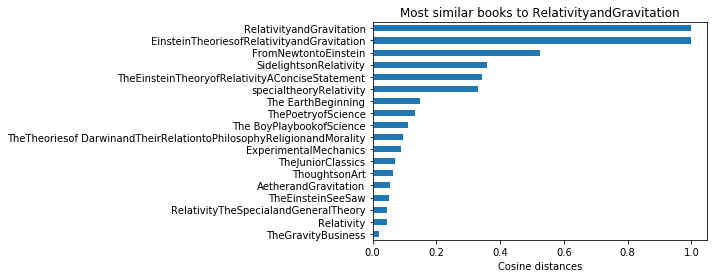

In [44]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to
v = sim_df[bookInterstedIn]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distances")
plt.ylabel("")
plt.title("Most similar books to "+ bookInterstedIn)


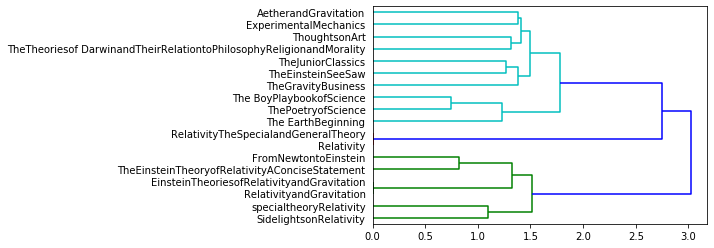

In [45]:
#Compute the similarity matrix the WVMA (Ward variance minimization algorithm)
Z = hierarchy.linkage(sim_df, 'ward')

# Display the results in horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=10, labels=sim_df.index,  orientation="right")